In [120]:
%matplotlib inline
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import metrics

import pandas
import random

In [121]:
# We can only plot 3 of the 4 iris features, since we only see in 3D.
# These are the ones the example code picked
X_FEATURE = 'petal width (cm)' 
Y_FEATURE = 'sepal length (cm)' 
Z_FEATURE = 'petal length (cm)'

FIGURES_PER_ROW = 3 
MAX_CLUSTERS = 6 

In [122]:
def add_plot(figure, subplot_num, subplot_name, data, labels):
    '''Create a new subplot in the figure.'''

    # create a new subplot
    axis = figure.add_subplot(FIGURES_PER_ROW, MAX_CLUSTERS / FIGURES_PER_ROW, subplot_num, projection='3d',
                              elev=48, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)

In [123]:
iris = datasets.load_iris()


In [124]:
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


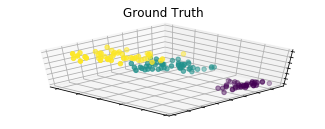

In [125]:
# start a new figure to hold all of the subplots
figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))

# Plot the ground truth
add_plot(figure, 1, "Ground Truth", iris_df, iris.target)


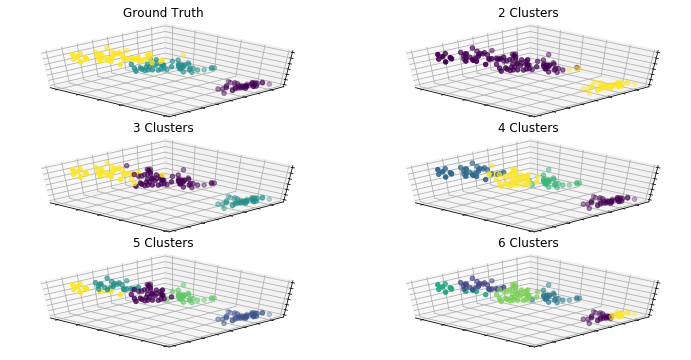

In [126]:
figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))
# Plot the ground truth
add_plot(figure, 1, "Ground Truth", iris_df, iris.target)

for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(iris_df)
    # get the predictions of which cluster each input is in
    labels = model.labels_
    add_plot(figure, num_clusters, '{} Clusters'.format(num_clusters), iris_df, labels.astype(numpy.float))

In [127]:
model = KMeans(n_clusters=6)
model.fit(iris_df)
model.predict(iris_df)




array([1, 5, 5, 5, 1, 1, 5, 5, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 0, 0, 0, 4, 3, 4, 0, 4,
       0, 0, 0, 2, 2, 0, 0, 4, 4, 2, 0, 2, 4, 2, 0, 4, 2, 2, 0, 0, 4, 4,
       0, 2, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [169]:

iris_ranges = []
smallest_values = []
for i in range (len(iris_df.keys())):
    smallest_value = 1000
    largest_value = 0
    for j in range (len (iris_df[iris_df.keys()[i]])):
        if iris_df[iris_df.keys()[i]][j] < smallest_value:
            smallest_value = iris_df[iris_df.keys()[i]][j]
        if iris_df[iris_df.keys()[i]][j] > largest_value:
            largest_value = iris_df[iris_df.keys()[i]][j]
    iris_ranges.append(largest_value - smallest_value)
    smallest_values.append(smallest_value)
iris_ranges
smallest_values

[4.3, 2.0, 1.0, 0.1]

In [129]:
def compare_arrays(array1,array2):
    for i in range(len(array1)):
        if (array1[i] != array2[i]):
            return False
    return True


In [130]:
def update_clusters(centroids):
    cluster_indexes = []
    for i in range (len(iris_df)):
        differences = []
        for j in range (len(centroids)):
            total_distance = 0
            for k in range (len(iris_df.keys())):
                dist = (iris_df[iris_df.keys()[k]][i] - centroids[j][k])**2
                total_distance = total_distance + dist
            differences.append(total_distance)
        closest = 10000
        index = 0
        for l in range (num_clusters):
            if differences[l] < closest:
                closest = differences[l]
                index = l
        cluster_indexes.append(index)
    cluster_indexes
    predictions = numpy.asarray(cluster_indexes)
    return predictions

In [131]:
def update_centroids(predictions):
    new_centroids = []
    for i in range (num_clusters):
        centroids = []
        total_values = []
        for j in range (len(iris_df.keys())):
            values = []
            for k in range (len(iris_df)):
                if predictions[k] == i:
                    values.append(iris_df[iris_df.keys()[j]][k])
            total_values.append(values)
        for l in range (len(total_values)):
            total = 0
            for m in range (len(total_values[l])):
                total = total + total_values[l][m]
            if total == 0:
                initial_centroids = []
                for i in range(num_clusters):
                    x = []
                    for j in range(len(iris_ranges)):
                        x.append(random.uniform(smallest_values[j],(iris_ranges[j] + smallest_values[j])))
                    initial_centroids.append(x)
                predictions = update_clusters(initial_centroids)
                return update_centroids(predictions)
            average = total/(len(total_values[l]))
            centroids.append(average)
        new_centroids.append(centroids)
    return new_centroids
            

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 

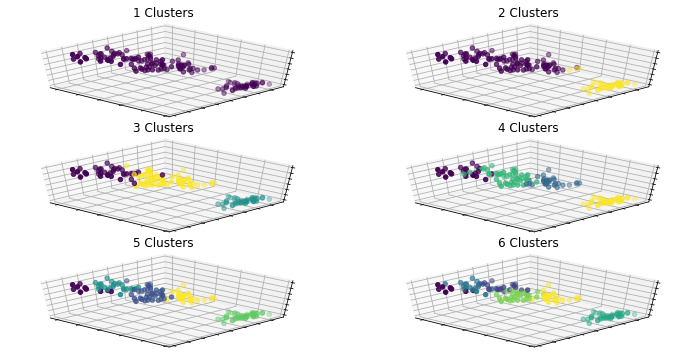

In [178]:
num_clusters = 6
initial_centroids = []
for i in range(num_clusters):
    x = []
    for j in range(len(iris_ranges)):
        x.append(random.uniform(smallest_values[j],(iris_ranges[j] + smallest_values[j])))
    initial_centroids.append(x)

figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))
for i in range (1,MAX_CLUSTERS+1):
    num_clusters = i
    predictions = update_clusters(initial_centroids)
    for _ in range (100):
        new_centroids = update_centroids(predictions)
        if compare_arrays(predictions, update_clusters(new_centroids)):
            break
        predictions = update_clusters(new_centroids)
    print(predictions)
    add_plot(figure, num_clusters, '{} Clusters'.format(num_clusters), iris_df, predictions.astype(numpy.float))

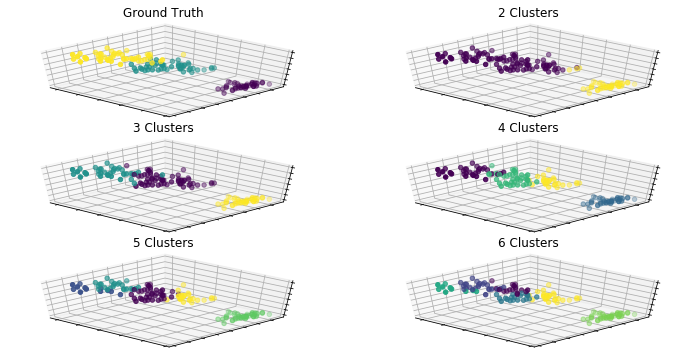

In [176]:
figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))
# Plot the ground truth
add_plot(figure, 1, "Ground Truth", iris_df, iris.target)

for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters, init= 'random')
    model.fit(iris_df)
    # get the predictions of which cluster each input is in
    labels = model.labels_
    add_plot(figure, num_clusters, '{} Clusters'.format(num_clusters), iris_df, labels.astype(numpy.float))

In [222]:
num_clusters = 3
initial_centroids = []
for i in range(num_clusters):
    x = []
    for j in range(len(iris_ranges)):
        x.append(random.uniform(smallest_values[j],(iris_ranges[j] + smallest_values[j])))
    initial_centroids.append(x)
predictions = update_clusters(initial_centroids)
for _ in range (1000):
    new_centroids = update_centroids(predictions)
    if compare_arrays(predictions, update_clusters(new_centroids)):
        break
    predictions = update_clusters(new_centroids)
print(predictions)
add_plot(figure, num_clusters, '{} Clusters'.format(num_clusters), iris_df, predictions.astype(numpy.float))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [223]:
metrics.fowlkes_mallows_score(predictions, iris.target) 
#

0.8112427991975698

In [219]:
model = KMeans(n_clusters=3, init= 'random')
model.fit(iris_df)
# get the predictions of which cluster each input is in
labels = model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [220]:
metrics.fowlkes_mallows_score(labels, iris.target) 

0.8208080729114153